**Objectif** : Prédire si une personne est infectée du covid en fonction de différentes variables

**Métrique** : F1 --> 50% et Recall --> 70%

Precision, Recall, Score F1

Bonne réponse du modèle :

    Vrais positifs  : le patient a la covid et le modèle indique que le patient a le covid

    Vrais négatifs  : le patient n'a pas le covid et le modèle indique que le patient n'a pas le covid
    

Mauvaise réponse du modèle :

    Faux négatifs : le patient a le covid et le modèle indique que le patient n'a pas le covid

    Faux positifs : le patient n'a pas le covid et le modèle indique que le patient a le covid

Précision : TP / (TP + FP)

    Mesure des faux positifs, Plus cette métrique est élévé, plus le taux de faux positif est faible

Recall ou sensibilité : TP / (TP + FN)

    Mesure des faux négatifs, Plus cette métrique est élévé, plus le taux de faux négatif est faible
    

F1 score = 2*(precision * recall) / (precision + recall)

    Mesure global du modèle

Cette métrique donne une bonne idée de la performance globale du modèle.

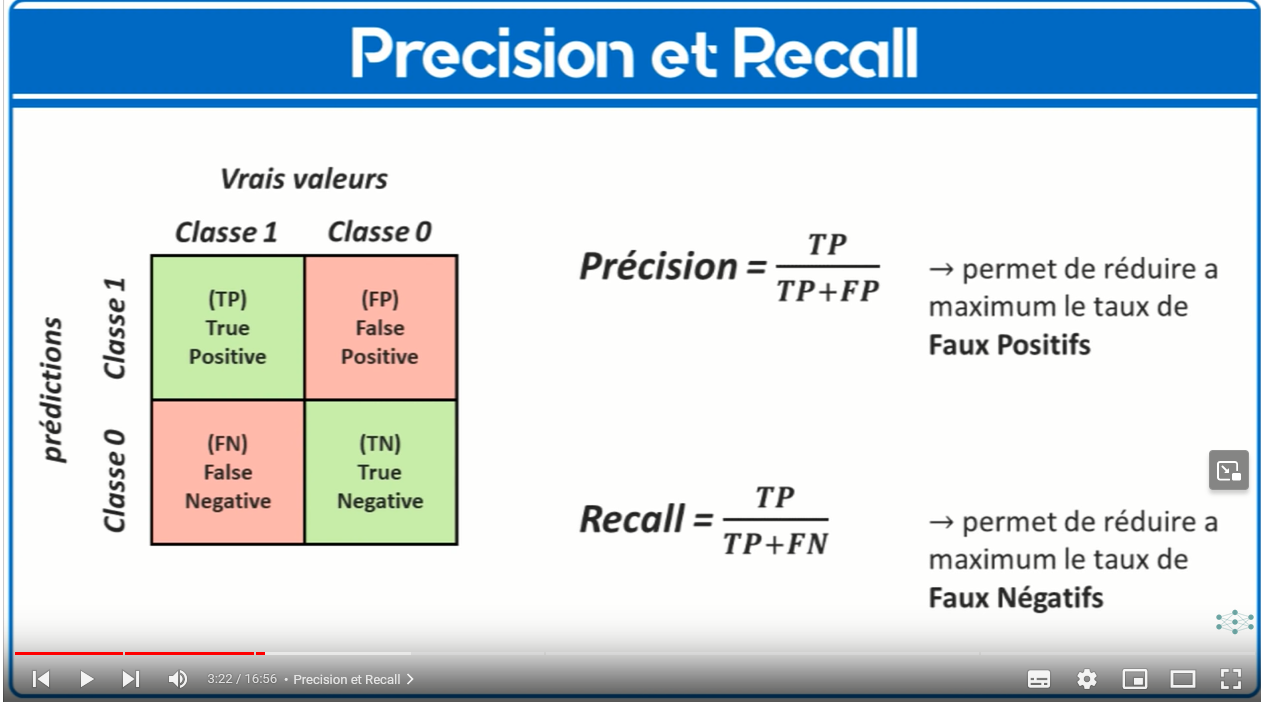

## Trame

I - Analyse de la forme:

	§ Identification de la target
        **Objectif** : Prédire si une personne est infectée du covid en fonction de différentes variables
        **Métrique** : F1 --> 50% et Recall --> 70%

	§ Nombre des lignes et de colonnes 
        (5644, 111)

	§ Identification des valeurs manquantes 
        88% de valeurs manquantes globales
        72 variables avec un taux de valeurs manquantes > 90%        
        
	§ Types de variables
        float64    70
        object     37
        int64       4


II - Analyse du fond:

	§ Visualisation de la target (histogramme/boxplot)
        negative    5086    90%
        positive     558    10%

	§ Compréhension des différentes variables (recherche)
    Après suppression des variables "vides"
        16 variables liées aux globules
        15 variables liées aux maladies
        3 variables liées à l'admission dans un service 
        1 variable d'âge 
        la variable cible


	§ Visualisation des relations : features/target
    
            Il semblerait que les patients atteints du covid sont légèrement plus âgés que les patients non atteints (médiane à 11 contre mediane à 9 annéé ? on ne sait pas). 


    Il semblerait que la distribution des Platelets, Leukocytes, Eosinophils et Monocytes est différente chez les personnes atteintes ou non du covid.



    Les tableaux de contingence ne montrent aucun lien entre une autre maladie et le covid.

    Pour le Rhinovirus/Enterovirus a été détécté 6 fois chez des patients atteint du covid mais cela ne semble pas significatifs.



    Le tableau des résidus standardisés indiquent un lien entre les variables covid et type d'hospitalisation est significatif en particulier à l'intersection soin normaux et positif au covid.

    Cependant pas assez de données renseignées concernant le type d'hospitalisation pour chaque patient, difficile de conclure.
    

    On voit que les variables Hematocrit, Hemoglobin et Platelets sont très corrélées, environ 90%

	§ Identification des outliers



Pre-processing



Objectif: transformer le data pour le mettre dans un format propice au machine learning



	§ Création du Train Set / Test Set

	§ Élimination des NaN : dropna(), imputation, colonne"vides"

	§ Encodage

	§ Suppression des outliers néfastes au modèle

	§ Feature selection

	§ Feature engineering

	§ Feature scaling



Modelling



Objectif: développer un modèle de machine learning capable de répondre a l'objectif final.



	§ Définir une fonction d'évaluation

	§ Entrainement de différents modèles

	§ Optimisation avec GridSearchCV

	§ Analyse des erreurs et retour au Preprocessing / EDA

    § Learning Curve et prise de décision

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [370]:
df = pd.read_excel('dataset.xlsx')
covid = df.copy()
covid.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Dimensions du dataset

In [371]:
covid.shape

(5644, 111)

#### Nombre de colonnes par type

In [372]:
covid.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

#### Proportion de valeurs nulles par colonnes

In [373]:
covid.isna().sum().sort_values()/covid.shape[0]

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [374]:
# variables où le taux de valeurs manquantes est supérieur à 90%
print(covid.columns[covid.isna().sum().sort_values()/covid.shape[0] > 0.9])

# nombre de variables où le taux de valeurs manquantes est supérieur à 90%
print("Nombre de variables où le taux de valeurs manquantes est supérieur à 90%")
print(len(covid.columns[covid.isna().sum().sort_values()/covid.shape[0] > 0.9].to_list()))

Index(['Neutrophils', 'Urea', 'Proteina C reativa mg/dL', 'Creatinine',
       'Potassium', 'Sodium', 'Influenza B, rapid test',
       'Influenza A, rapid test', 'Alanine transaminase',
       'Aspartate transaminase', 'Gamma-glutamyltransferase ',
       'Total Bilirubin', 'Direct Bilirubin', 'Indirect Bilirubin',
       'Alkaline phosphatase', 'Ionized calcium ', 'Strepto A', 'Magnesium',
       'pCO2 (venous blood gas analysis)',
       'Hb saturation (venous blood gas analysis)',
       'Base excess (venous blood gas analysis)',
       'pO2 (venous blood gas analysis)', 'Fio2 (venous blood gas analysis)',
       'Total CO2 (venous blood gas analysis)',
       'pH (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)',
       'Rods #', 'Segmented', 'Promyelocytes', 'Metamyelocytes', 'Myelocytes',
       'Myeloblasts', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite',

#### Taux global de valeurs manquantes dans le dataset

In [375]:
covid.isna().sum().sum()/(covid.shape[0]*covid.shape[1])

0.8806003026414082

<AxesSubplot:>

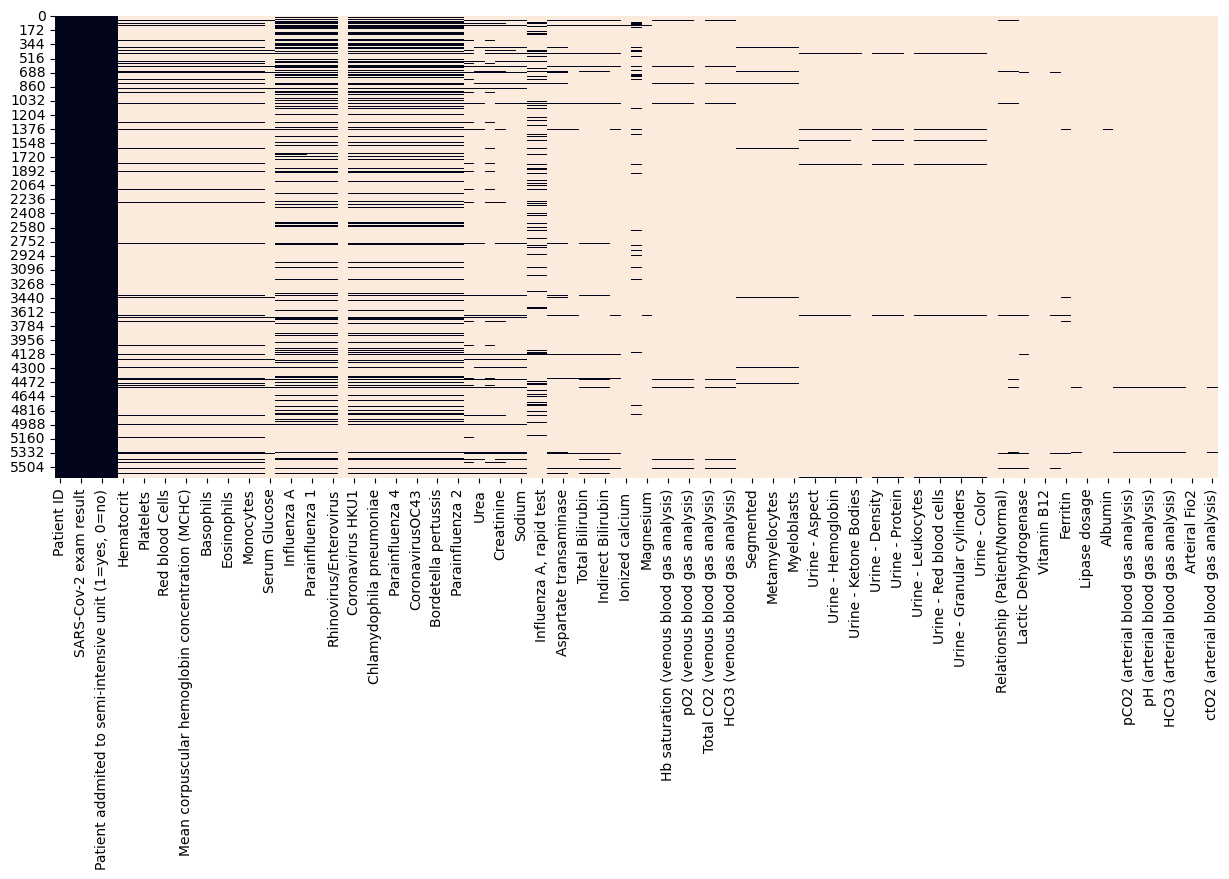

In [376]:
plt.figure(figsize=(15,6))
sns.heatmap(covid.isna(), cbar=False)

On voit bien ici qu'il y a énormément de valeurs manquantes, 88% en l'occurence.

Il semblerait également qu'il y est un lien entre certaines variables, qu'il y est une présence ou une absence de données pour les mêmes patients.

#### Supression des colonnes où le taux de valeurs manquantes est > 90%

In [377]:
variables_suppr = covid.columns[(covid.isna().sum()/covid.shape[0]) > 0.9].to_list()

In [378]:
covid = covid.drop(columns=variables_suppr)
covid = covid.drop(columns='Patient ID')
# 73 variables supprimées

In [379]:
covid.shape

(5644, 38)

#### Traitement des doublons

In [380]:
covid[covid.duplicated()]

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
6,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Liste des colonnes par type

In [381]:
numeric_columns = covid.select_dtypes(include='int').columns.to_list()
decimal_columns = covid.select_dtypes(include='float').columns.to_list()
categorical_columns = covid.select_dtypes(include='object').columns.to_list()

#### Liste des colonnes par catégorie

Il semblerait qu'une partie des variables soit la détection d'une maladie ou non chez le patient et d'autres variables, un taux d'un type de globule dans l'organisme.

In [382]:
covid.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [383]:
variables_globules = covid.iloc[:,5:].select_dtypes(include='float').columns.to_list()
variables_maladies = covid.iloc[:,5:].select_dtypes(include='object').columns.to_list()
variables_admission = ['Patient addmited to regular ward (1=yes, 0=no)',
                      'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                      'Patient addmited to intensive care unit (1=yes, 0=no)']

In [384]:
covid.shape

(5644, 38)

In [385]:
# on retombe bien sur nos 37 variables
print(f"{len(variables_globules)} variables liées aux globules")
print(f"{len(variables_maladies)} variables liées aux maladies")
print(f"3 variables liées à l'admission dans un service, 1 variable d'âge et la variable cible")

14 variables liées aux globules
19 variables liées aux maladies
3 variables liées à l'admission dans un service, 1 variable d'âge et la variable cible


#### Forme de la variable cible

In [386]:
covid['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

#### Analyse univariée de la variable âge + Analyse bivariée par rapport à la variable cible
histogramme général

boxplot comparative des catégorie chez les patients testés + et -

<AxesSubplot:xlabel='Patient age quantile', ylabel='Count'>

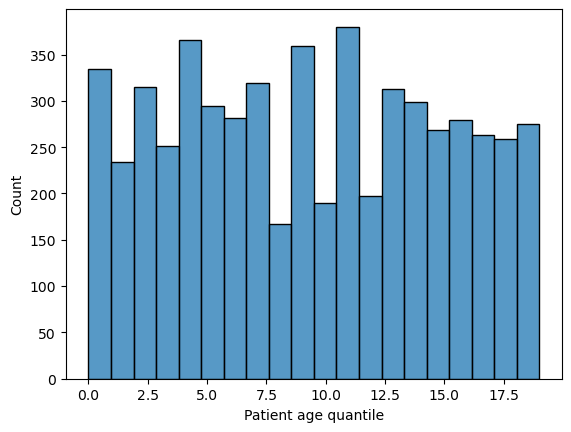

In [387]:
sns.histplot(covid['Patient age quantile'], bins=len(covid['Patient age quantile'].unique()))

<AxesSubplot:xlabel='Patient age quantile', ylabel='SARS-Cov-2 exam result'>

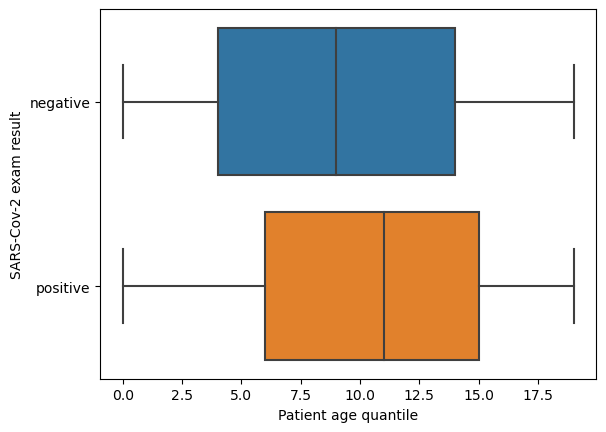

In [388]:
sns.boxplot(data=covid, x='Patient age quantile', y='SARS-Cov-2 exam result')

Il semblerait que les patients atteints du covid sont légèrement plus âgés que les patients non atteints (médiane à 11 contre mediane à 9 annéé ? on ne sait pas). 

#### Analyse univariée des variables globules + Analyse bivariée par rapport à la variable cible
histogramme général

boxplot comparative des catégorie chez les patients testés + et -

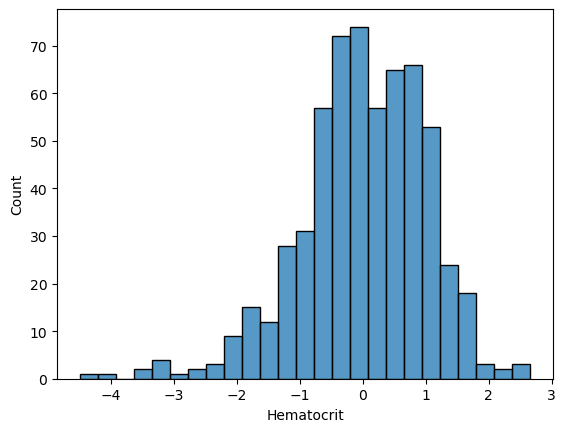

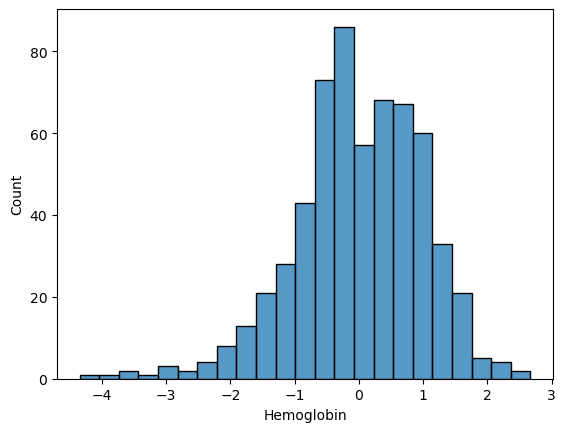

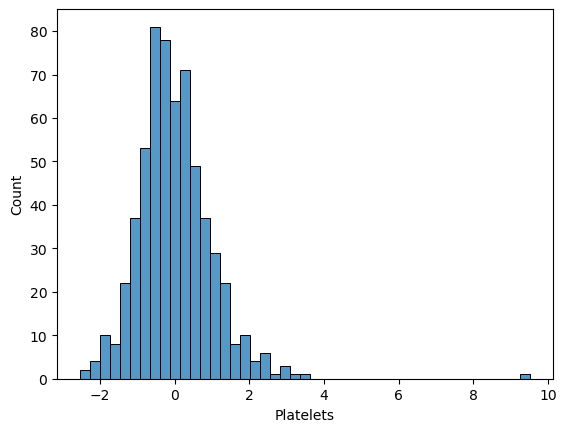

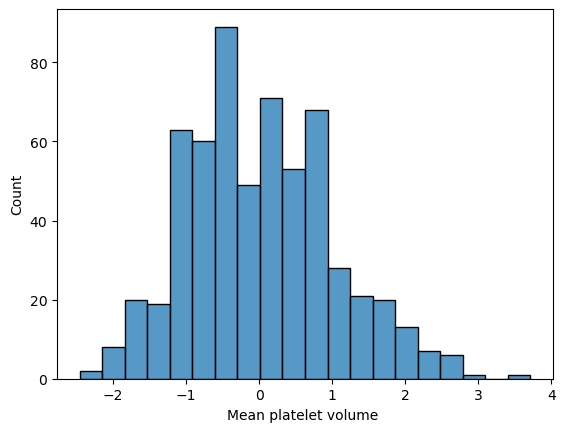

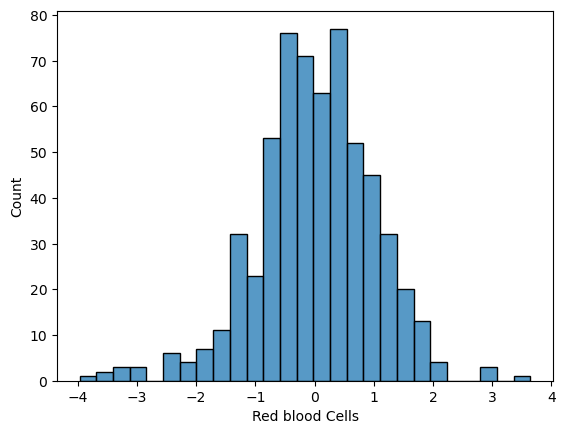

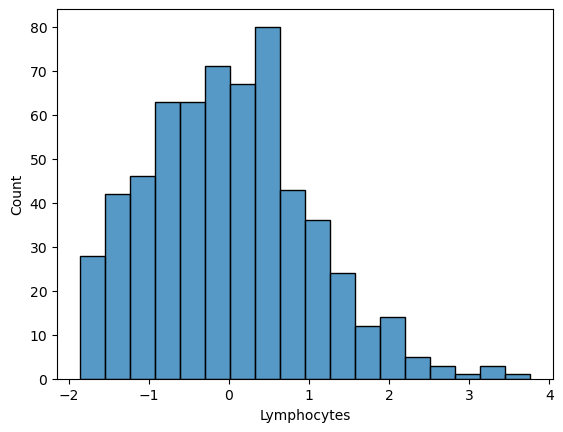

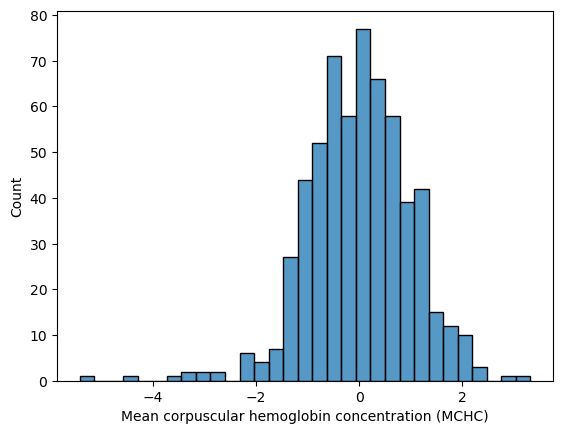

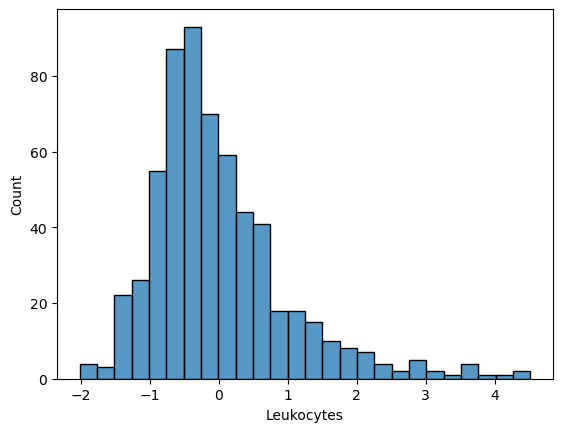

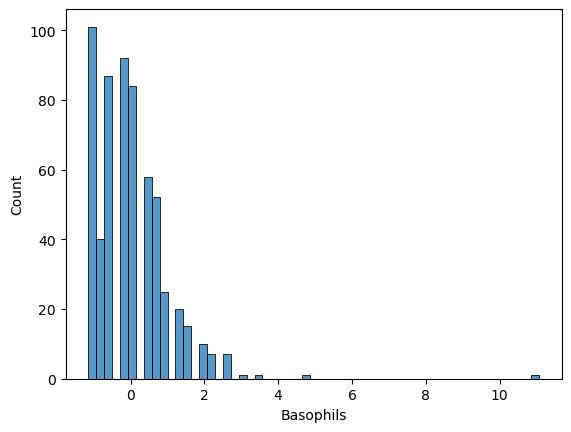

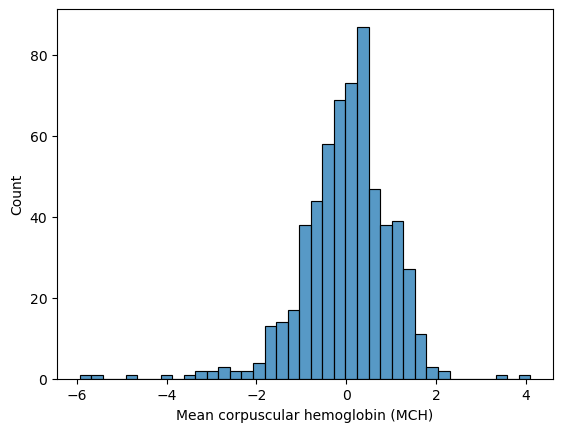

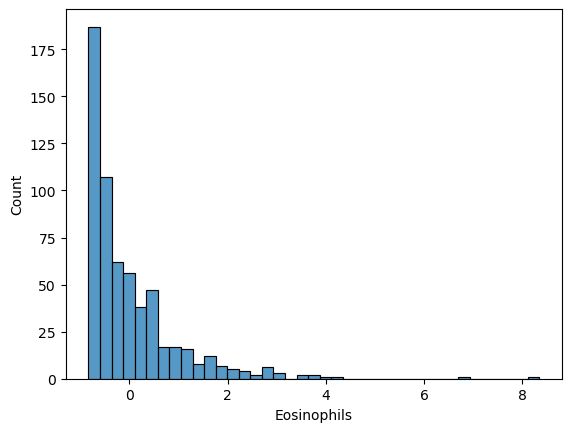

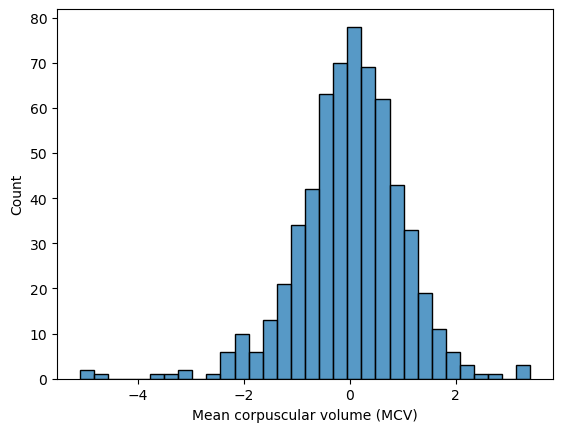

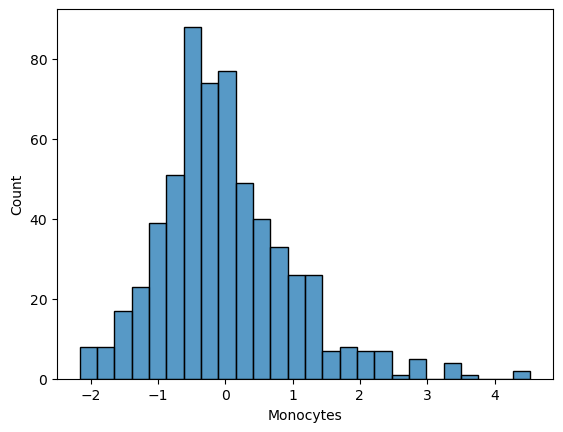

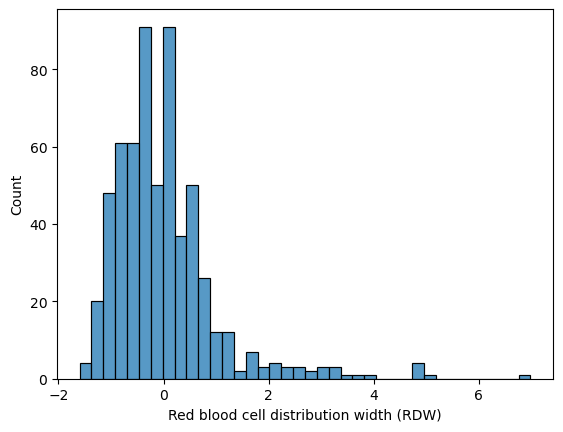

In [389]:
for var in variables_globules :
    plt.figure()
    sns.histplot(covid[var])

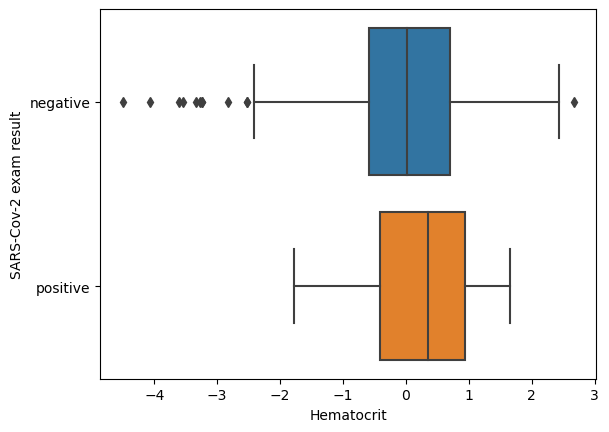

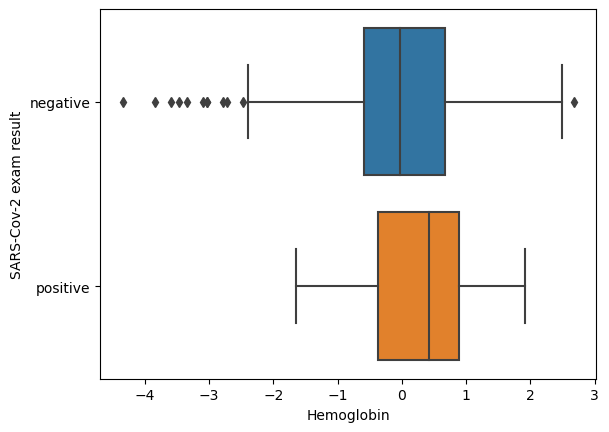

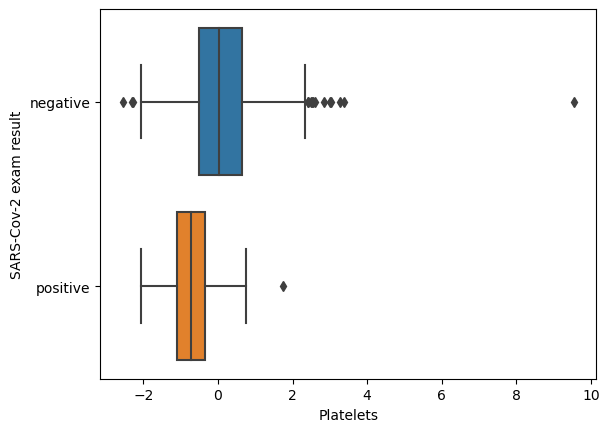

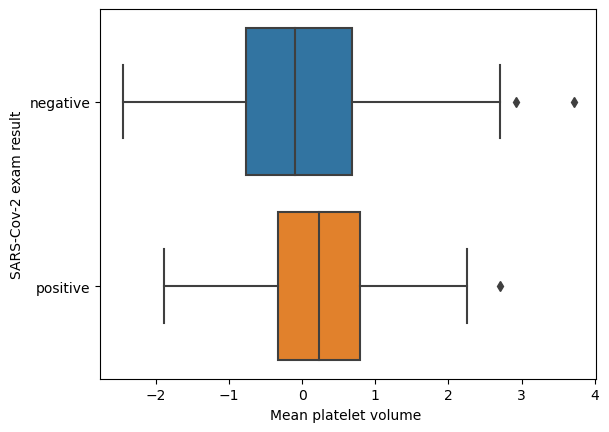

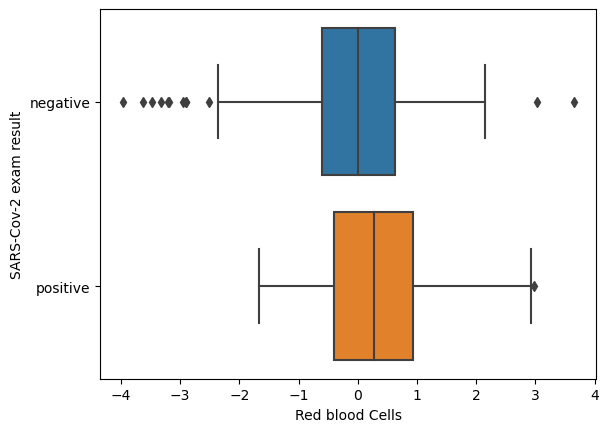

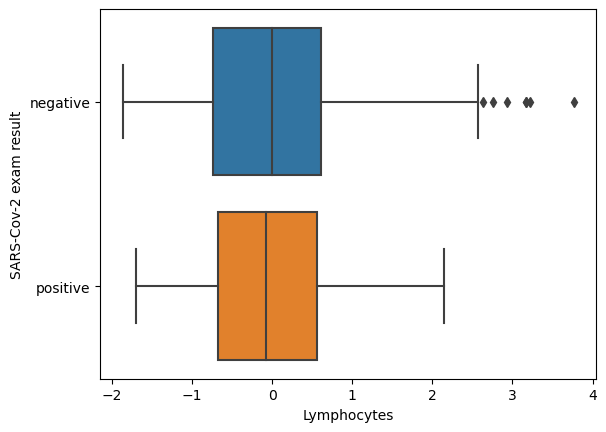

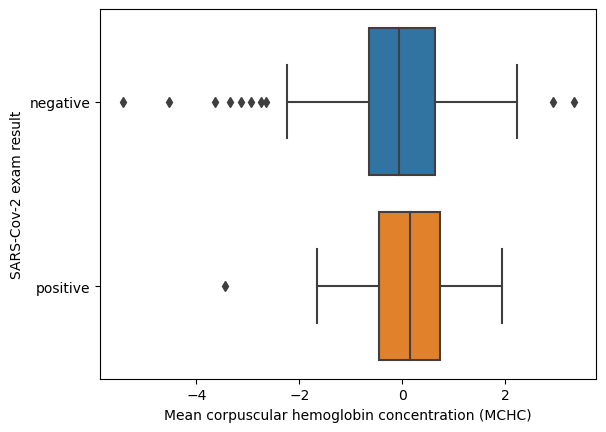

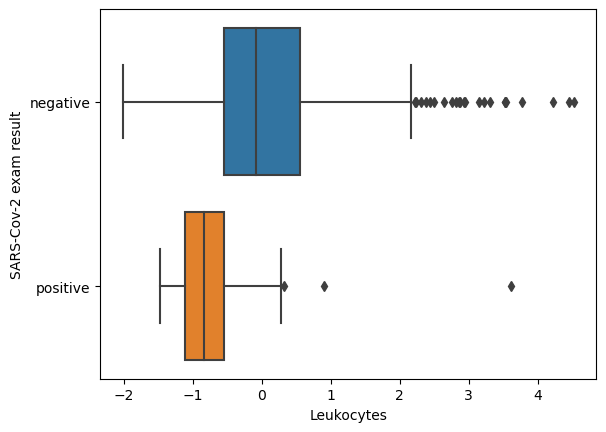

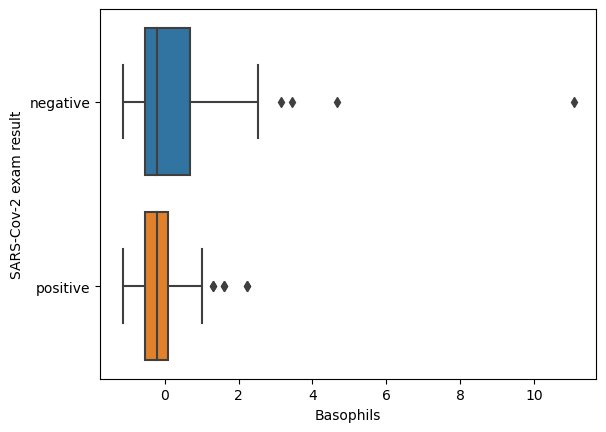

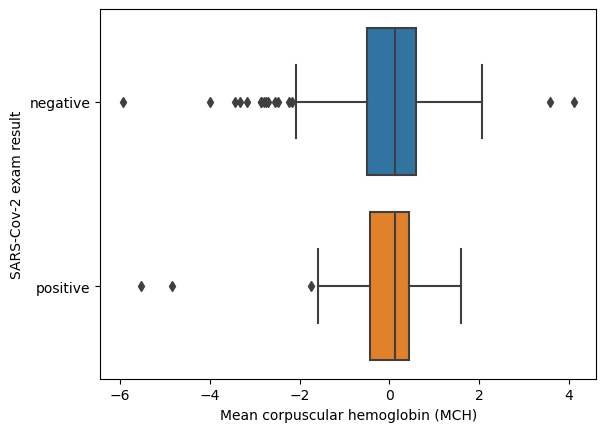

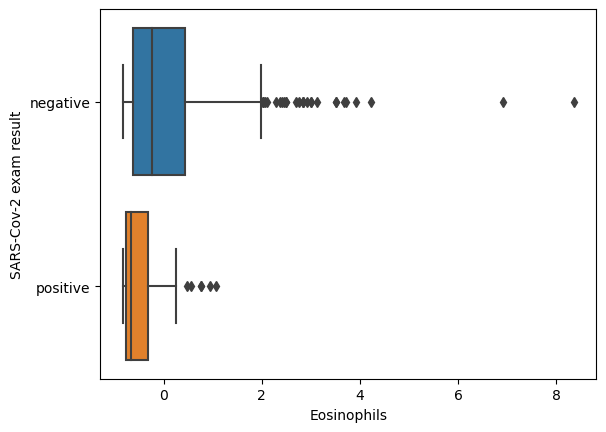

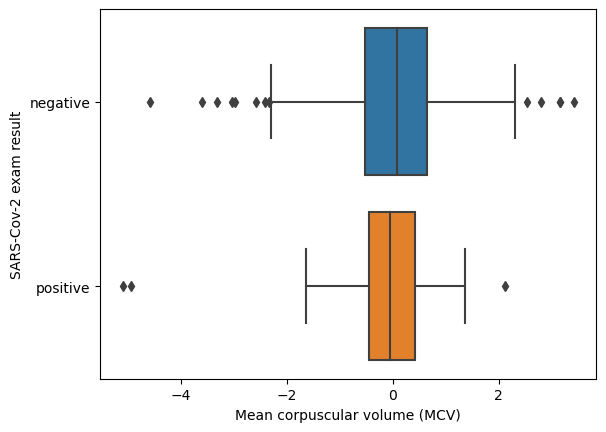

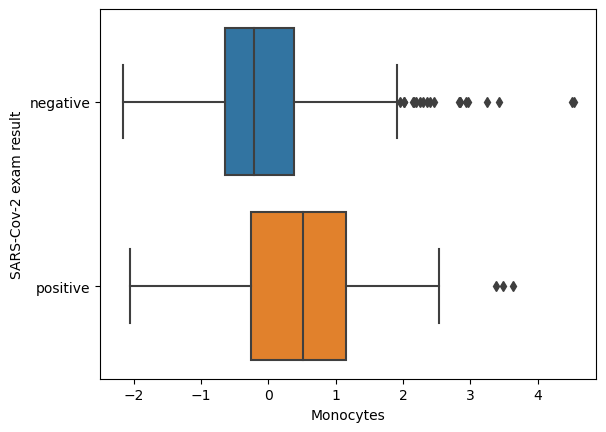

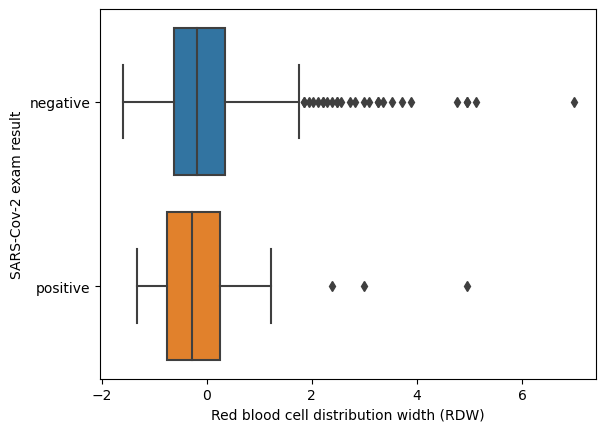

In [390]:
for var in variables_globules :
    plt.figure()
    sns.boxplot(data=covid, x=var, y='SARS-Cov-2 exam result' )

Il semblerait que les différences soit significatives pour les Platelets, Leukocytes, Eosinophils, Monocytes au niveau des distribution des taux de ces globules pour les personnes atteintes ou non atteintes du covid.

#### Analyse univariée des variables maladies + Analyse bivariée par rapport à la variable cible
Proportion de chaque valeurs de chaque variable

tableau de contingence

In [391]:
for var in variables_maladies:
    print(var)
    print(covid[var].value_counts())
    print('-'*100)

Respiratory Syncytial Virus
not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64
----------------------------------------------------------------------------------------------------
Influenza A
not_detected    1336
detected          18
Name: Influenza A, dtype: int64
----------------------------------------------------------------------------------------------------
Influenza B
not_detected    1277
detected          77
Name: Influenza B, dtype: int64
----------------------------------------------------------------------------------------------------
Parainfluenza 1
not_detected    1349
detected           3
Name: Parainfluenza 1, dtype: int64
----------------------------------------------------------------------------------------------------
CoronavirusNL63
not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64
----------------------------------------------------------------------------------------------------
Rhinovirus/Entero

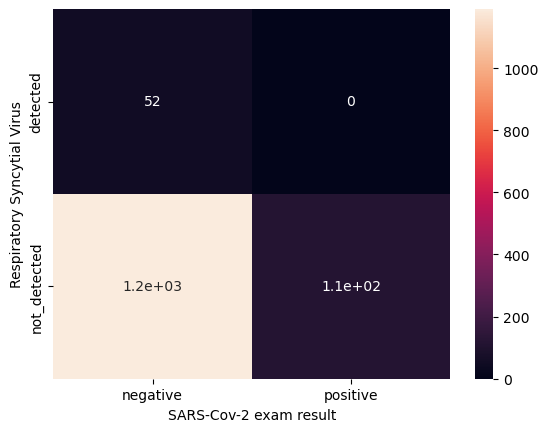

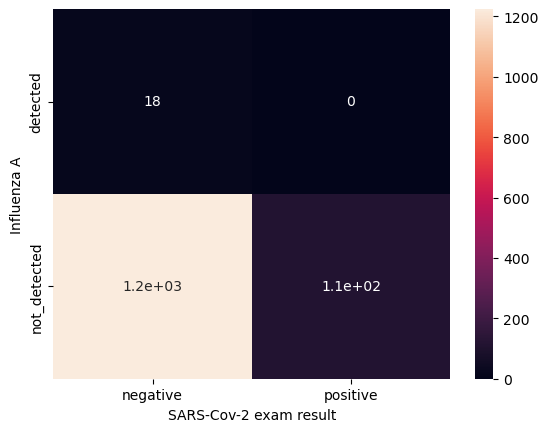

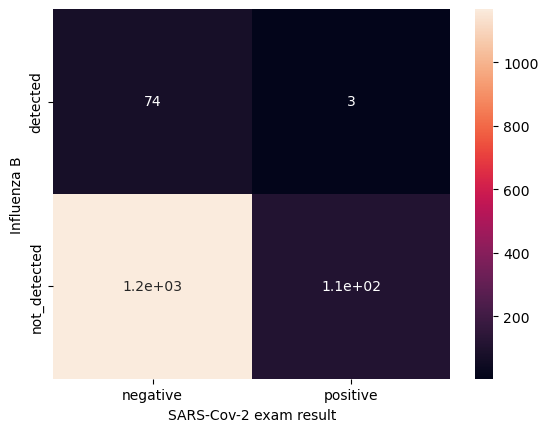

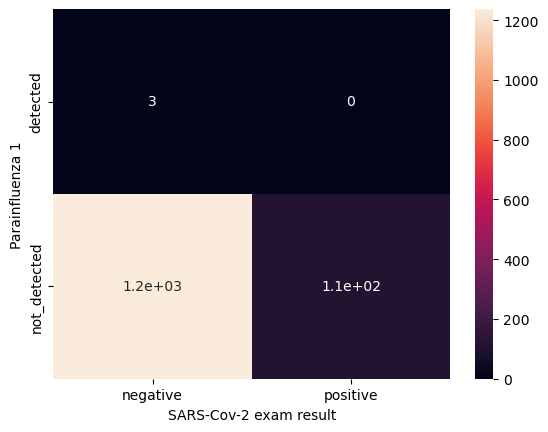

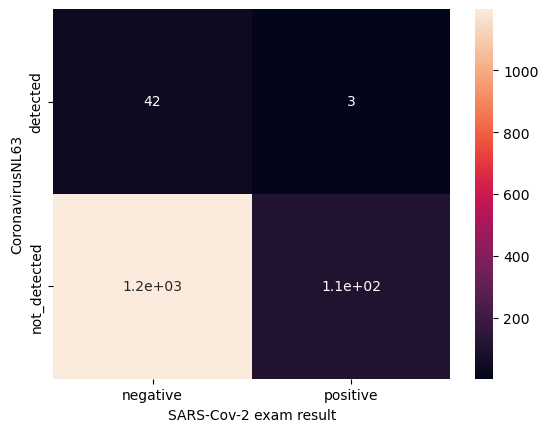

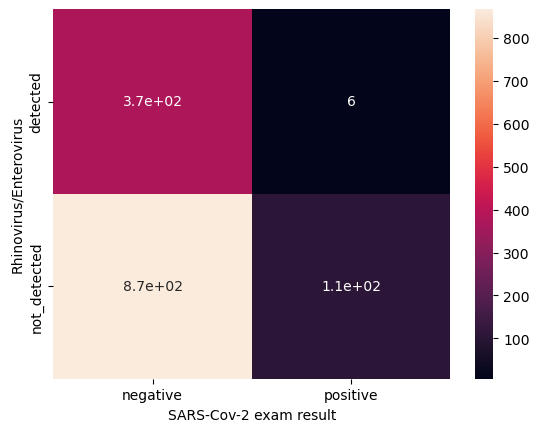

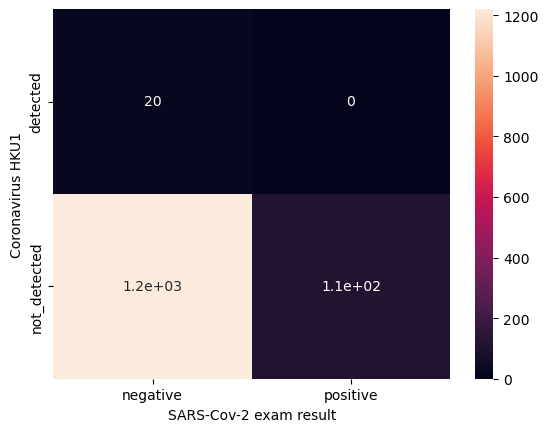

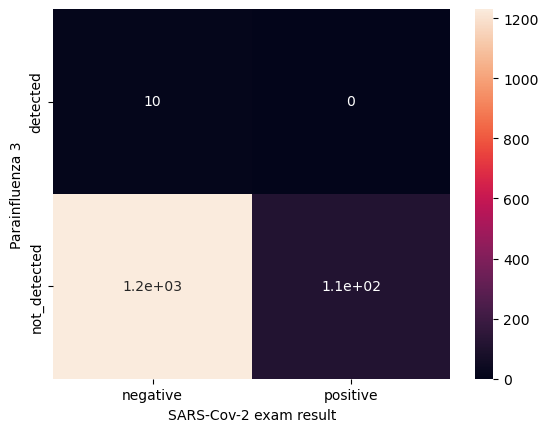

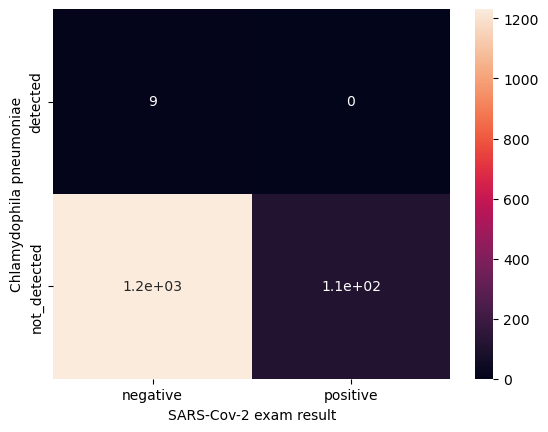

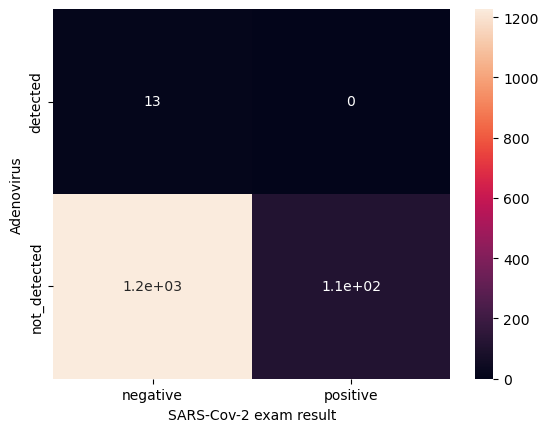

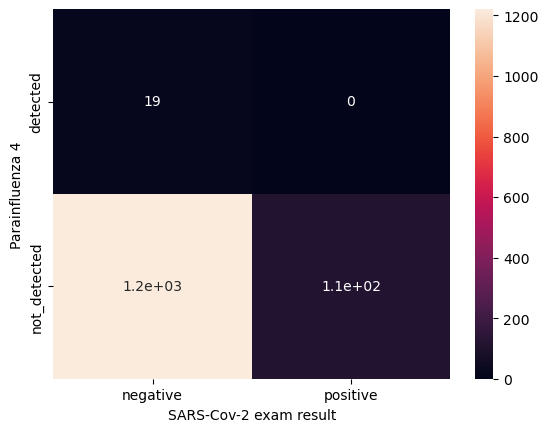

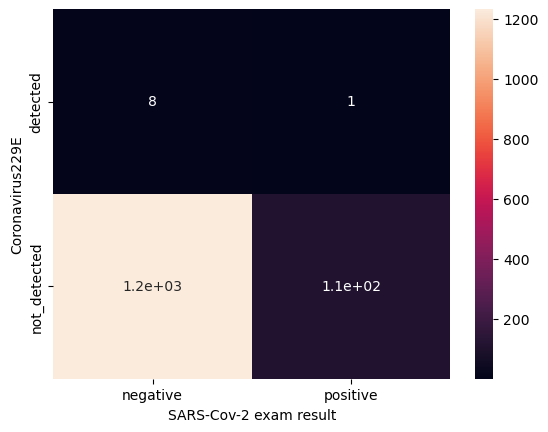

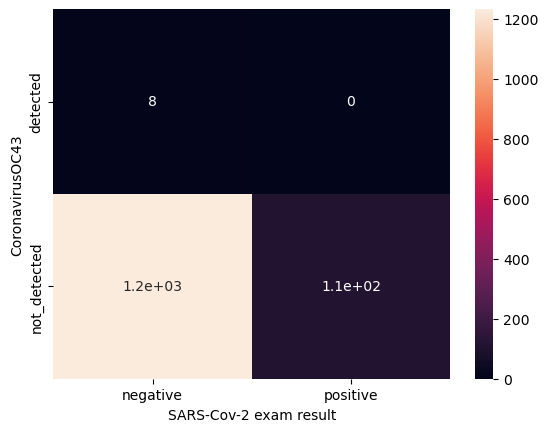

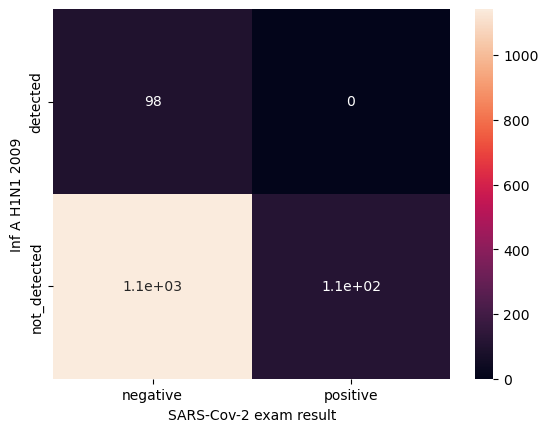

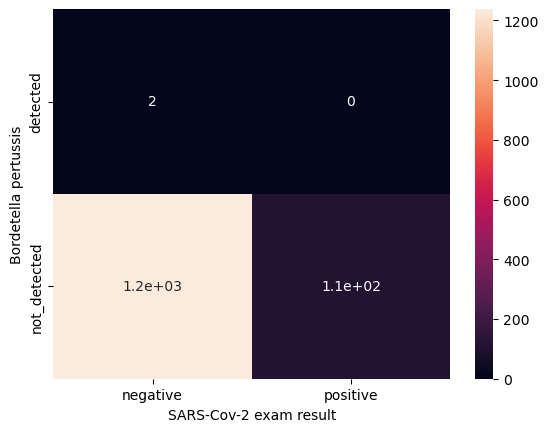

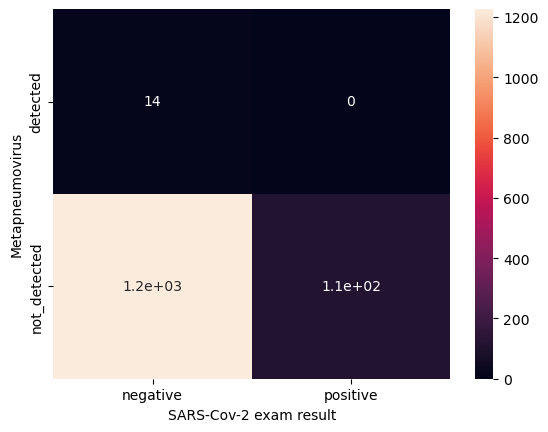

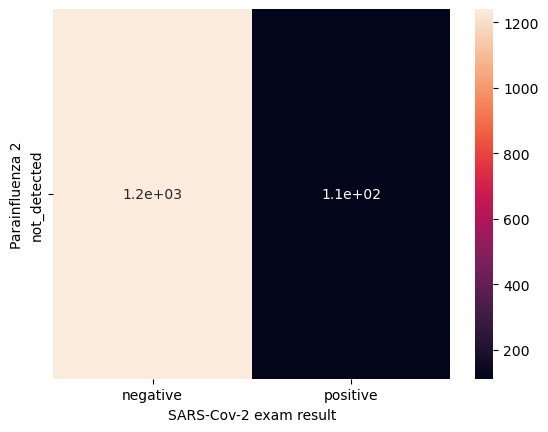

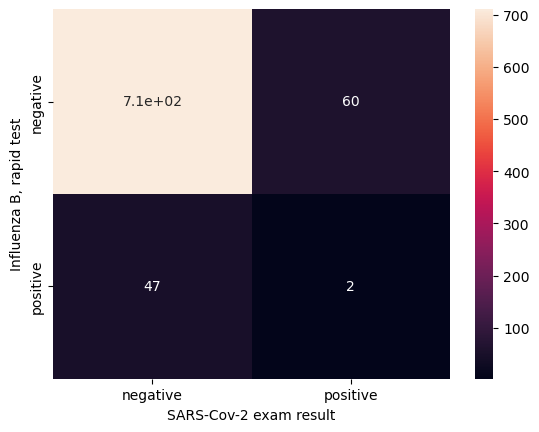

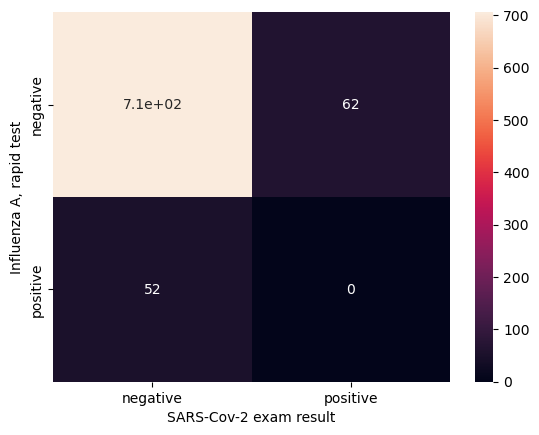

In [392]:
for var in variables_maladies:
    plt.figure()
    sns.heatmap(pd.crosstab(index=covid[var], columns=covid['SARS-Cov-2 exam result']), annot=True)

Les tableaux de contingence ne montrent aucun lien entre une autre maladie et le covid.

Pour le Rhinovirus/Enterovirus a été détécté 6 fois chez des patients atteint du covid mais cela ne semble pas significatifs.

In [393]:
covid['Rhinovirus/Enterovirus'].value_counts()

not_detected    973
detected        379
Name: Rhinovirus/Enterovirus, dtype: int64

#### Analyse univariée des variables admissions + Analyse bivariée par rapport à la variable cible
Proportion de chaque valeurs de chaque variable

tableau de contingence

In [394]:
covid

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [395]:
def hospitalisation(covid):
    if covid['Patient addmited to regular ward (1=yes, 0=no)'] == 1 : 
        return 'soins normaux'
    if covid['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1 : 
        return 'soins semi intensifs'
    if covid['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1 : 
        return 'soins intensifs'
    else : return 'inconnu'

In [396]:
covid['hospitalisation'] = covid.apply(hospitalisation, axis=1)

In [397]:
pd.crosstab(index=covid['hospitalisation'], columns=covid['SARS-Cov-2 exam result'], margins=True)

SARS-Cov-2 exam result,negative,positive,All
hospitalisation,,,
inconnu,4968,506,5474
soins intensifs,33,8,41
soins normaux,43,36,79
soins semi intensifs,42,8,50
All,5086,558,5644


In [398]:
crosstab = pd.crosstab(index=covid['hospitalisation'], columns=covid['SARS-Cov-2 exam result'], margins=True)

In [399]:
def residus_standardises(crosstab) :
    
    from scipy.stats import chi2_contingency

    statistic_test_chi_square, pvalue, degre_liberte, expected_count= chi2_contingency(crosstab.iloc[:-1, :-1])

    # calcul des ni, les sous totaux des colonnes
    ni=crosstab.iloc[-1,:-1].values

    # calcul des nj, les sous totaux des lignes 
    nj=crosstab.iloc[:-1,-1].values

    # on redimensionne les matrices pour le produit matriciel
    ni = np.reshape(ni, (1,(crosstab.shape[1]-1)))
    nj = np.reshape(nj, ((crosstab.shape[0]-1),1))

    # calcul des count, les fréquences réelles
    count=crosstab.iloc[:-1, :-1]

    # Tableau des résidus
    numerateur = (count-expected_count)
    denominateur = np.sqrt(ni*nj/crosstab.iloc[-1,-1])
    tableau_residus=numerateur/denominateur
    
    print(f"Le chi2 est de {statistic_test_chi_square}")
    return tableau_residus

In [400]:
residus_standardises(crosstab)

Le chi2 est de 121.8060538278858


SARS-Cov-2 exam result,negative,positive
hospitalisation,,
inconnu,0.501079,-1.512786
soins intensifs,-0.649269,1.960179
soins normaux,-3.341030,10.086755
soins semi intensifs,-0.455379,1.374814


Le tableau des résidus standardisés indiquent un lien entre les 2 variables en particulier à l'intersection soin normaux et positif au covid.

Cependant pas assez de données renseignées concernant le type d'hospitalisation pour chaque patient, difficile de conclure.

#### Corrélation variables globules

<AxesSubplot:>

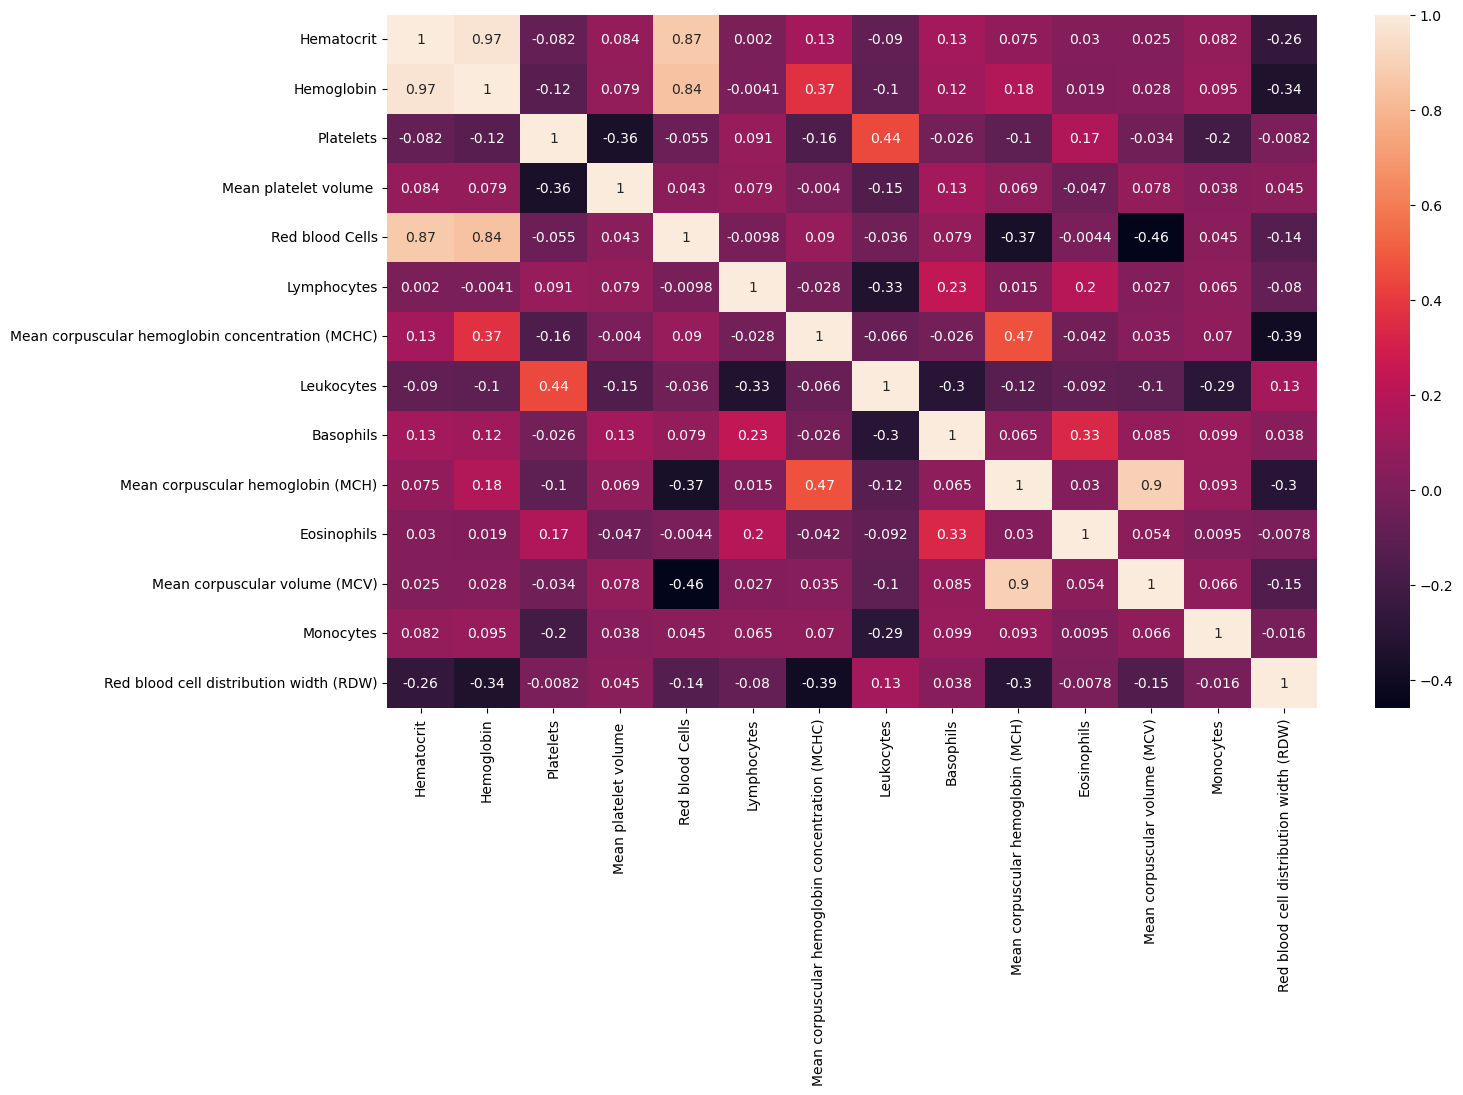

In [401]:
plt.figure(figsize=(15,9))
sns.heatmap(covid[variables_globules].corr(), annot=True)

On voit que les variables Hematocrit, Hemoglobin et Platelets sont très corrélées, environ 90%

<Figure size 1500x900 with 0 Axes>

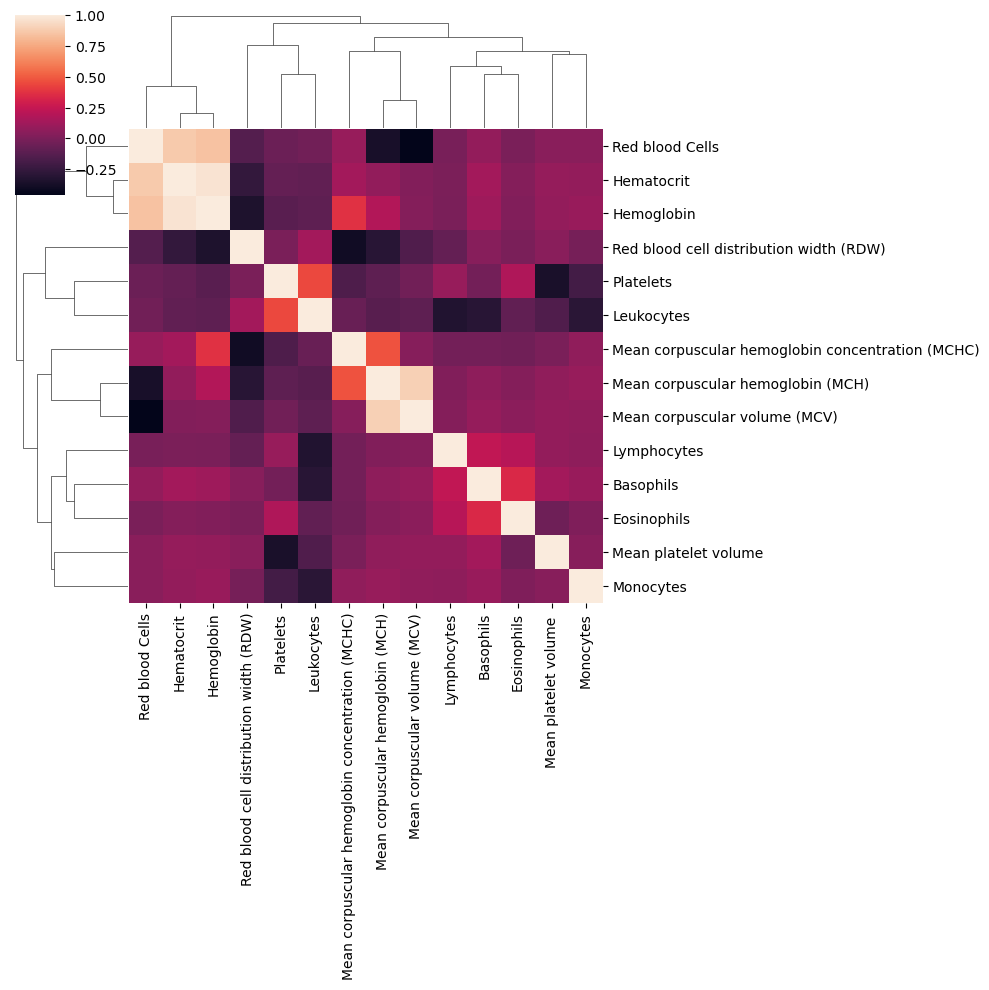

In [402]:
plt.figure(figsize=(15,9))
sns.clustermap(covid[variables_globules].corr())

## Preprocessing

#### Suppression de colonnes

In [661]:
data = df.copy()
data = data.drop(columns='Patient ID')

In [662]:
variables_suppr = data.columns[(data.isna().sum()/data.shape[0]) > 0.9].to_list()
data = data.drop(columns=variables_suppr)

In [663]:
data = data.drop(columns=['Influenza B, rapid test','Influenza A, rapid test'])

In [664]:
variables_globules = data.iloc[:,5:].select_dtypes(include='float').columns.to_list()
variables_maladies = data.iloc[:,5:].select_dtypes(include='object').columns.to_list()
variables_hospital = data[['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)']].columns.to_list()
variable_age = ['Patient age quantile']
variable_cible = ['SARS-Cov-2 exam result']

In [665]:
data['malade'] = data[data[variables_maladies] == 'detected'].any(axis=1).replace([False,True],[0,1])

In [666]:
data = data[variable_cible+variable_age+variables_globules+variables_maladies]
#data = data[variable_cible+['Leukocytes','Platelets','Monocytes','Eosinophils','Red blood Cells']]
data

,SARS-Cov-2 exam result,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,negative,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,17,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,negative,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,positive,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,negative,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,negative,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,negative,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Création trainset et testset

In [667]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

In [685]:
print('trainset')
print(data_train.shape)
print(data_train['SARS-Cov-2 exam result'].value_counts())
print('testset')
print(data_test.shape)
print(data_test['SARS-Cov-2 exam result'].value_counts())

trainset
(4515, 34)
0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64
testset
(1129, 34)
0    1018
1     111
Name: SARS-Cov-2 exam result, dtype: int64


#### Encodage des chaines de caractères

In [669]:
def encodage(data):
    
    data['SARS-Cov-2 exam result']=data['SARS-Cov-2 exam result'].replace(['negative', 'positive'], [0,1])
    
    for element in data.select_dtypes(include='object'):
        data[element] = data[element].replace(['not_detected', 'detected'], [0,1])
    
    return data

In [670]:
def feature_engineering(data):
    
    data['malade'] = data[data[variables_maladies] == 'detected'].any(axis=1).replace([False,True],[0,1])
    
    return data

In [671]:
def imputation(data):
    
    return data.dropna(axis=0)

In [672]:
def preprocessing(data) : 
    
    data = feature_engineering(data)
    data = encodage(data)
    data = imputation(data)
    
    
    X = data.drop(columns = 'SARS-Cov-2 exam result')
    y = data['SARS-Cov-2 exam result']
    
    return X, y

#### Modelisation

In [673]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC # efficace sur les petits dataset

In [686]:
X_train, y_train = preprocessing(data_train)
X_test, y_test = preprocessing(data_test)

In [687]:
print('trainset')
print(X_train.shape)
print(y_train.value_counts())
print('testset')
print(X_test.shape)
print(y_test.value_counts())

trainset
(296, 33)
0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64
testset
(66, 33)
0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


In [676]:
#preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [677]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=10))

In [678]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
KNeighborsClassifier = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
SGDClassifier = make_pipeline(preprocessor, StandardScaler(), SGDClassifier(random_state=0))
SVC = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

In [683]:
list_models = [RandomForest, AdaBoost, KNeighborsClassifier, SVC]

#### Procédure d'évaluation

In [680]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [681]:
def evaluation(model) : 
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # learning curve
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               scoring = 'f1', train_sizes=np.linspace(0.1, 1, 10), cv=5)
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('train_sizes')
    plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 23 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [15 16 18 19 21 22 23 24 25 26 27 28 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[53  1]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.80      0.33      0.47        12

    accuracy                           0.86        66
   macro avg       0.83      0.66      0.70        66
weighted avg       0.86      0.86      0.84        66



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16 18 21 22 23 24 25 26 28 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16 18 21 23 25 26 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16 18 23 25 29 31] are constant.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 19 21 22 23 24 25 26 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 24 25 26 27 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 24 25 26 27 29 31]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 19 21 22 23 24 25 26 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 24 25 26 27 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 24 25 26 27 29 31]

[[53  1]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.86      0.50      0.63        12

    accuracy                           0.89        66
   macro avg       0.88      0.74      0.78        66
weighted avg       0.89      0.89      0.88        66



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [15 16 18 19 21 22 23 24 25 26 27 28 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16 18 21 22 23 24 25 26 28 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16 18 21 23 25 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 24 25 26 27 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 23 24 25 26 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 23 24 26 29 31] are constant.
  warn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 24 25 26 27 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 23 24 25 26 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 23 25 29 31] are constant.
  warnings.w

[[52  2]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.78      0.58      0.67        12

    accuracy                           0.89        66
   macro avg       0.85      0.77      0.80        66
weighted avg       0.89      0.89      0.89        66



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 23 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 23 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 24 25 26 27 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 23 25 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklea

[[54  0]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       1.00      0.42      0.59        12

    accuracy                           0.89        66
   macro avg       0.94      0.71      0.76        66
weighted avg       0.91      0.89      0.88        66



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 19 21 22 23 24 25 26 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 19 21 22 23 24 25 26 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 21 22 23 25 26 27 29 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 23 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [18 23 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


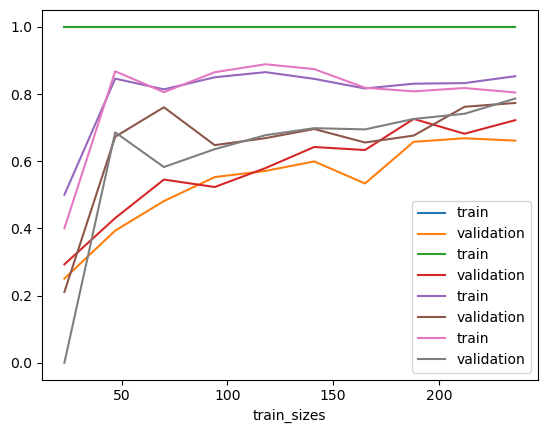

In [684]:
for model in list_models :
    evaluation(model)

#### Variables les + importantes pour le modèle

In [609]:
# variables qui ont le plus d'impact sur le modèle, on prends feature_importances > 0.01
variables_importantes = list(model_2.feature_names_in_[model_2.feature_importances_>0.06])

In [610]:
# 1 array en data + 1 array en index
features_importances = pd.DataFrame(model_2.feature_importances_, index=model_2.feature_names_in_, columns=['feature_importance'])
features_importances = features_importances.sort_values('feature_importance', ascending=False)
features_importances

,feature_importance
Leukocytes,0.222302
malade,0.185942
Basophils,0.093205
Platelets,0.083167
Eosinophils,0.065086
Red blood cell distribution width (RDW),0.061378
Red blood Cells,0.055133
Monocytes,0.051966
Mean corpuscular hemoglobin concentration (MCHC),0.048503
Mean corpuscular volume (MCV),0.046797


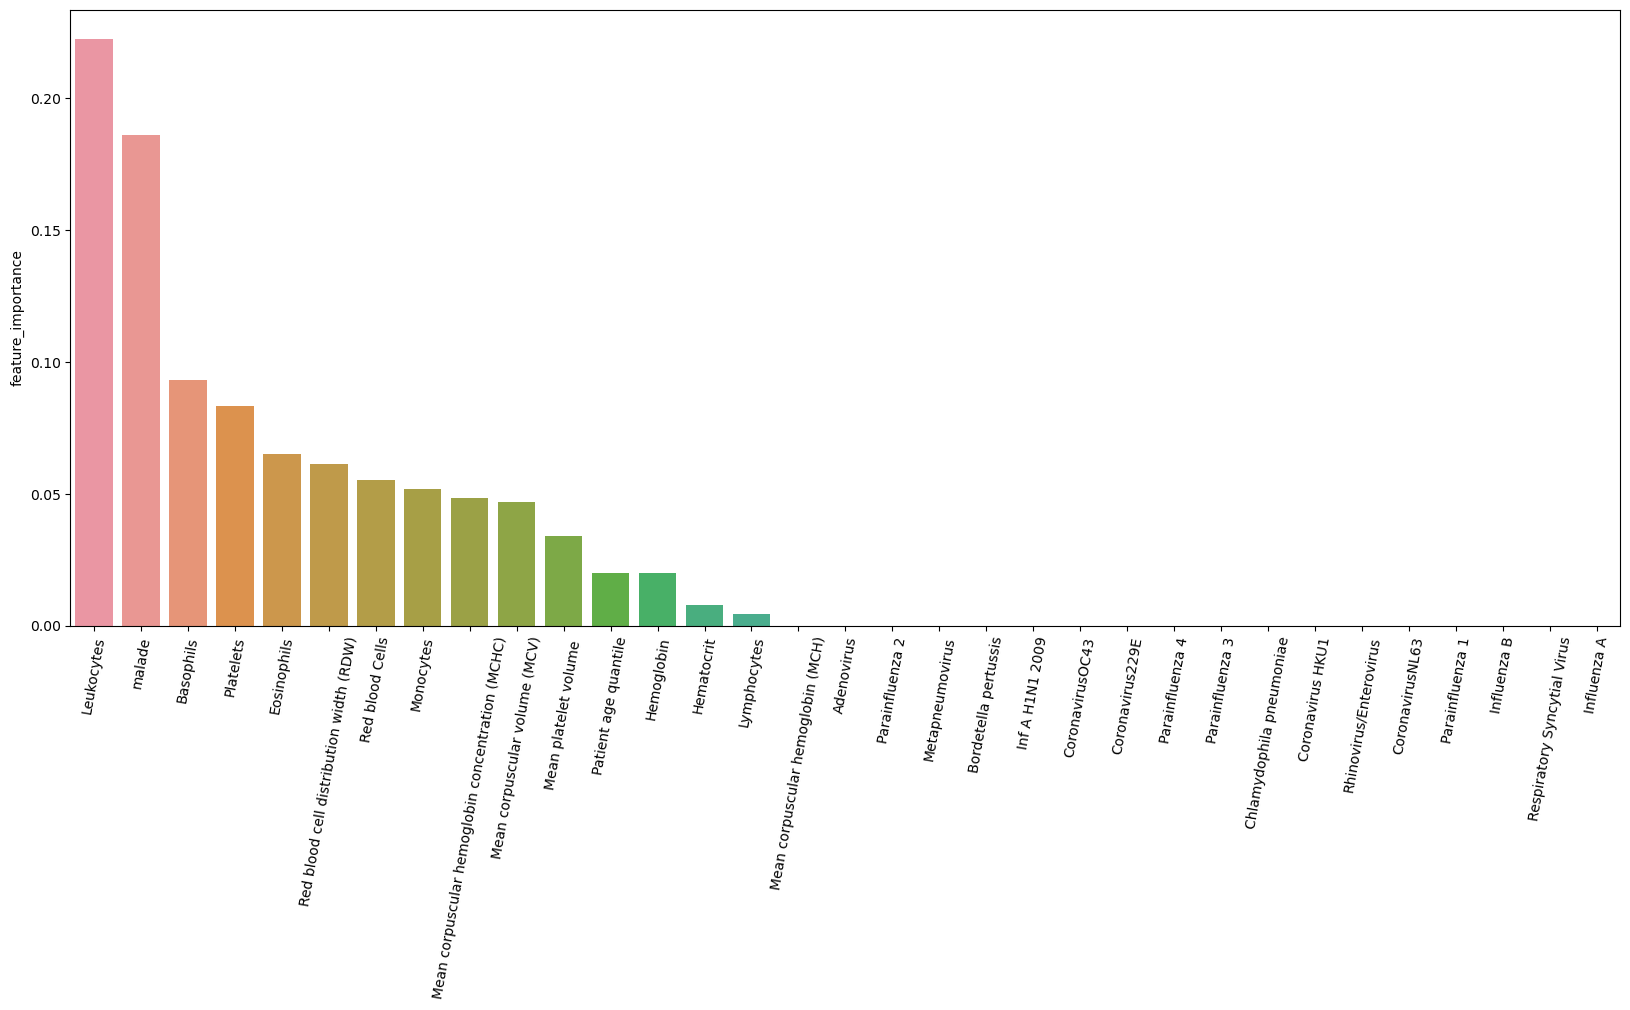

In [611]:
plt.figure(figsize=(20,8))
sns.barplot(data=features_importances, x=features_importances.index, y='feature_importance')
plt.xticks(rotation=80);

In [ ]:
X_train